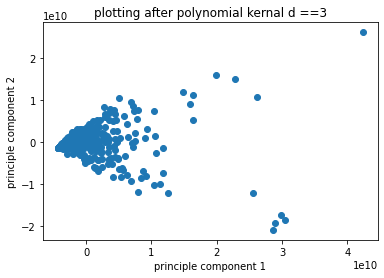

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data.values
y = mnist.target.astype(np.uint8)

# Flatten the images
Y= X.reshape(X.shape[0], -1)

#X = np.genfromtxt("Dataset.csv", delimiter=',')

subset_size = 500

# Select a random subset of the data
subset_indices = np.random.choice(70000, subset_size, replace=False)
X= Y[subset_indices]


X = X.T

Size = X.shape[1]

def display(pl1,pl2,d):
    plt.scatter(pl1,pl2,s=None)
    plt.title("plotting after polynomial kernal d =={}".format(d))
    plt.xlabel('principle component 1')
    plt.ylabel('principle component 2')
    plt.show()

def polyKernel(x,y,d):
    funxTy=(1+x.transpose()@y)
    return funxTy**d

def getKernelComponentsPolynomial(X,d):
    
    size = X.shape[1]
    N = np.full((size , size), 1/size)
    KernelMatrix = np.zeros((size,size))
    
    for i in range(size):
        for j in range(size):
            KernelMatrix[i,j] = polyKernel(X[:,i],X[:,j],d)

    KernelMatrixCentered = KernelMatrix - N@KernelMatrix - KernelMatrix@N + N@KernelMatrix@N
    eigenValue,eigenVector = np.linalg.eig(KernelMatrixCentered)

    eigenValue=eigenValue.real 
    eigenVector = eigenVector.real

    sortedEigenValues=np.flip(eigenValue.argsort())
    sortedEigenVector = eigenVector[:,sortedEigenValues]
    
    calcLamda=((np.abs(eigenValue))**0.5)
    sortedEigenVector = sortedEigenVector/calcLamda

    kernelSortEV=sortedEigenVector[:,0:2]
    kernel_comps = KernelMatrixCentered.T@(kernelSortEV);
    kernel_comps=kernel_comps.transpose();
                    

    return kernel_comps

kernelCompForD2 = getKernelComponentsPolynomial(X,d=2)

display(kernelCompForD2[0],kernelCompForD2[1],2)


kernelCompForD3 = getKernelComponentsPolynomial(X,d=3)

display(kernelCompForD3[0],kernelCompForD3[1],3)

kernelCompForD3 = getKernelComponentsPolynomial(X,d=4)

display(kernelCompForD3[0],kernelCompForD3[1],4)